# Data visualisation


We will be visualizing the collected data in the AI4AR study.

Our data consists of mpMRI images and annotations prepared by three radiologists, as well as clinical information and biopsy results with International Society of Urological Pathology (ISUP) Gleason grading for each lesion. The radiologists annotated the data with multiple imaging features for each lesion, using the assessment algorithm from the PI-RADS standard.

In order to gain a better understanding of the data and to identify any potential trends or patterns, we will be creating a variety of visualizations. These visualizations will include:
- Descriptive statistics: We will use histograms, box plots, and summary statistics to get a sense of the distribution and range of values for each of the variables in the dataset.
- Correlation plots: We will use scatter plots and heatmaps to investigate the relationships between different variables, such as the imaging features and the Gleason grade.
- Data distributions: We will use density plots and violin plots to visualize the distribution of values for each of the variables.
- Data comparisons: We will use bar plots, line plots, and box plots to compare the values of different variables across different groups or categories.

In selecting appropriate data visualization methods, we will consider the type of data (categorical or continuous), the number of variables being plotted, and the intended audience.

Let's begin by importing the necessary libraries and loading the data.

In [1]:
#!pip install --upgrade -e git+https://github.com/piotrsobecki/ai4ar-helper.git#egg=ai4ar

In [2]:
# Setup the notebook
%load_ext autoreload
%autoreload 2

# Add src to path
import sys 
import os 

if os.path.basename(os.getcwd()) != 'ai4ar-radiomics':
    os.chdir('..')

if 'src' not in sys.path:
    sys.path.append('src')

# Import config file
from utils import load_config

config = load_config('config/config.json')  

# AI4AR Helper package

In [3]:
import ai4ar

### Visualize data for the single case

On DataSet init, the images are not loaded

In [4]:
dataset = ai4ar.Dataset(config['data_dir'])

In [5]:
dataset.case_ids

['001',
 '003',
 '004',
 '005',
 '007',
 '008',
 '011',
 '014',
 '017',
 '022',
 '023',
 '026',
 '027',
 '031',
 '033',
 '046',
 '049',
 '054',
 '055',
 '057',
 '058',
 '061',
 '066',
 '068',
 '071',
 '074',
 '075',
 '076',
 '077',
 '079',
 '082',
 '086',
 '088',
 '090',
 '091',
 '094',
 '095',
 '096',
 '097',
 '098',
 '099',
 '1013',
 '1014',
 '1019',
 '1021',
 '1023',
 '1025',
 '1026',
 '103',
 '1031',
 '1036',
 '1038',
 '104',
 '1041',
 '1042',
 '1044',
 '1050',
 '1051',
 '1054',
 '1056',
 '1057',
 '1059',
 '106',
 '1060',
 '1063',
 '1066',
 '1077',
 '1079',
 '1085',
 '1086',
 '1088',
 '1090',
 '1093',
 '1096',
 '112',
 '1127',
 '1138',
 '1141',
 '1144',
 '1148',
 '1149',
 '1150',
 '1151',
 '1159',
 '116',
 '1161',
 '1165',
 '1170',
 '1177',
 '1178',
 '1183',
 '1184',
 '1187',
 '1188',
 '1189',
 '119',
 '1192',
 '1193',
 '1196',
 '1205',
 '1212',
 '1218',
 '122',
 '1221',
 '1224',
 '1225',
 '1228',
 '1230',
 '1232',
 '1238',
 '1239',
 '124',
 '1240',
 '1242',
 '1244',
 '1247',
 '125

In [6]:
case = dataset['001']
case.images_keys() # All images for the case

['anatomical_labels/afs',
 'anatomical_labels/cz',
 'anatomical_labels/pg',
 'anatomical_labels/pz',
 'anatomical_labels/sv_l',
 'anatomical_labels/sv_r',
 'anatomical_labels/tz',
 'data/adc',
 'data/cor',
 'data/dce1',
 'data/dce2',
 'data/dce3',
 'data/dce4',
 'data/dce5',
 'data/dce6',
 'data/hbv',
 'data/sag',
 'data/t2w',
 'lesion_labels/lesion1/adc/8ZmM76',
 'lesion_labels/lesion1/adc/OjmNZ8',
 'lesion_labels/lesion1/adc/OrjnrO',
 'lesion_labels/lesion1/dce3/OrjnrO',
 'lesion_labels/lesion1/hbv/8ZmM76',
 'lesion_labels/lesion1/hbv/OjmNZ8',
 'lesion_labels/lesion1/hbv/OrjnrO',
 'lesion_labels/lesion1/t2w/8ZmM76',
 'lesion_labels/lesion1/t2w/OjmNZ8',
 'lesion_labels/lesion1/t2w/OrjnrO']

# Visualize single image

Images are cached after first access

d:\workspace\ai4ar-radiomics\ai4ar-radiomics-env\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


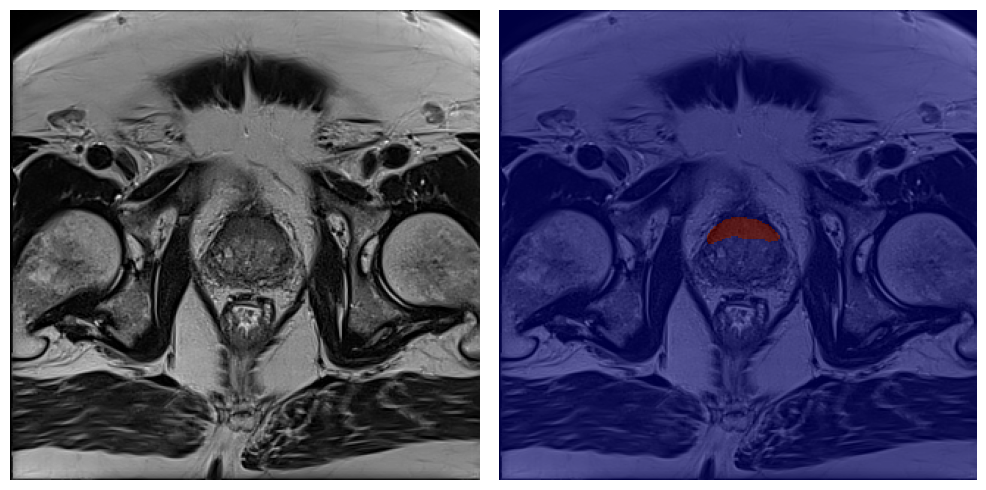

In [7]:
import matplotlib.pyplot as plt

# T2W image
t2w_img = case.image('data/t2w') 
# Combined lesion annotations
combined_t2w_mask_img = case.image('lesion_labels/lesion1/t2w', combine=True, cache=False, combine_pp = ai4ar.required_agreement(1)) 

t2w = t2w_img.arr()
combined_t2w_mask = combined_t2w_mask_img.arr()

# Select the max slice (biggest mask)
slice = ai4ar.select_slice(combined_t2w_mask)

# Show the combined mask on top of the image and the original image on left 
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(t2w[slice], cmap='gray')
ax[1].imshow(t2w[slice], cmap='gray')

# Show the combined mask on top of the image and the original image on left 
# The mask is shown in red and the image in grayscale, with the mask being semi-transparent but the 0 values are not shown and do not affect the underlying image
ax[1].imshow(combined_t2w_mask[slice], cmap='jet', alpha=0.5, interpolation='none', aspect='auto')

# ax[1].imshow(combined_t2w_mask[slice], cmap='jet', alpha=0.5)

# Hide the axis labels
ax[0].axis('off')
ax[1].axis('off')

fig.tight_layout()
fig.show()

# Combine lesion mask

Sum all annotations for lesion1 on t2w image. It's the same for other modalities

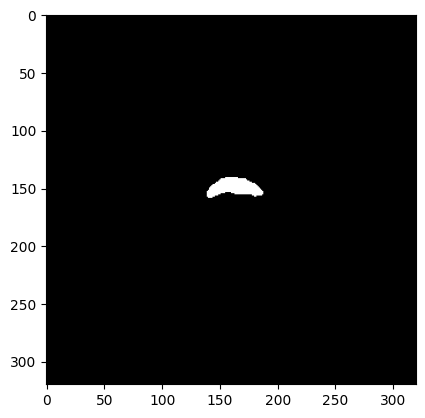

In [8]:
import matplotlib.pyplot as plt

combined_t2w_mask = case.image('lesion_labels/lesion1/t2w', combine=True)
combined_t2w_mask = combined_t2w_mask.arr()
# Visualize the combined mask (select_slice is a helper function to select the slice with the most mask)
plt.imshow(combined_t2w_mask[ai4ar.select_slice(combined_t2w_mask)], cmap='gray')


Now it's cached

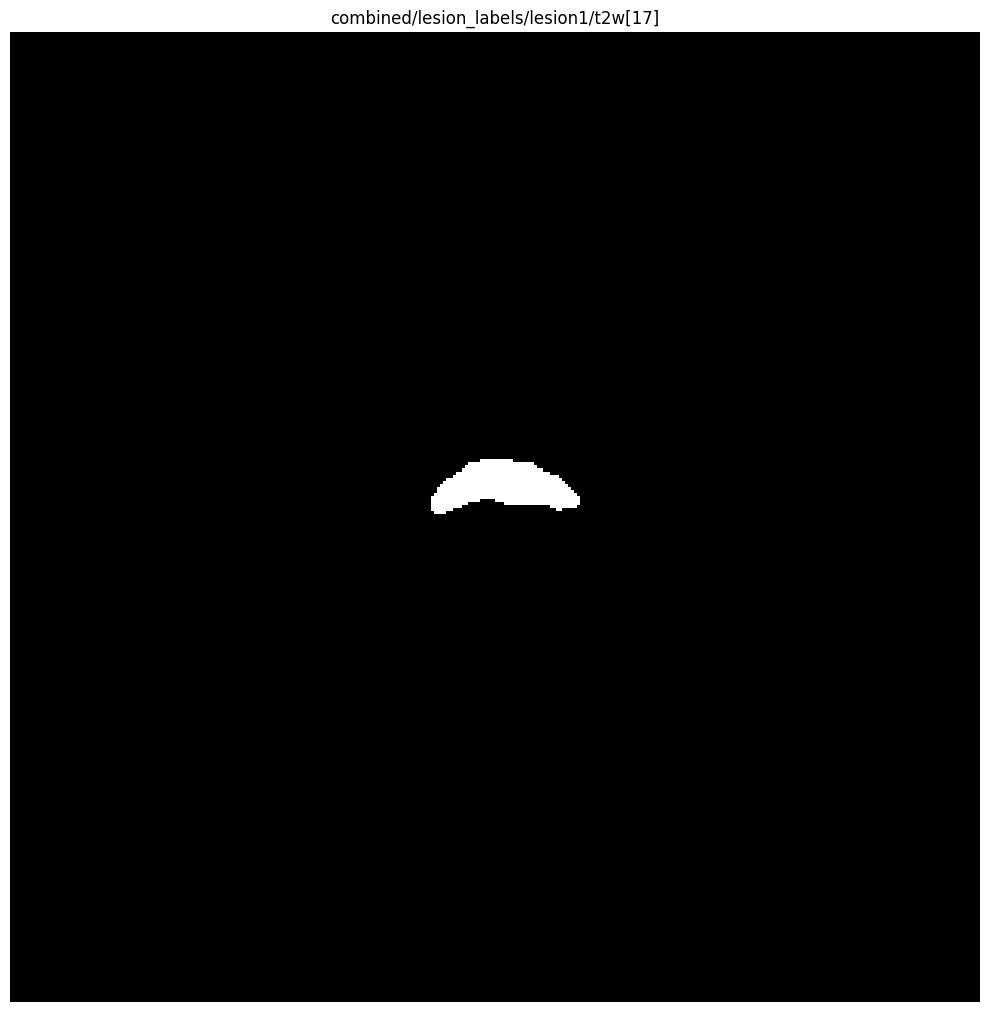

In [13]:
case.visualize('combined/')

# Visualize all images

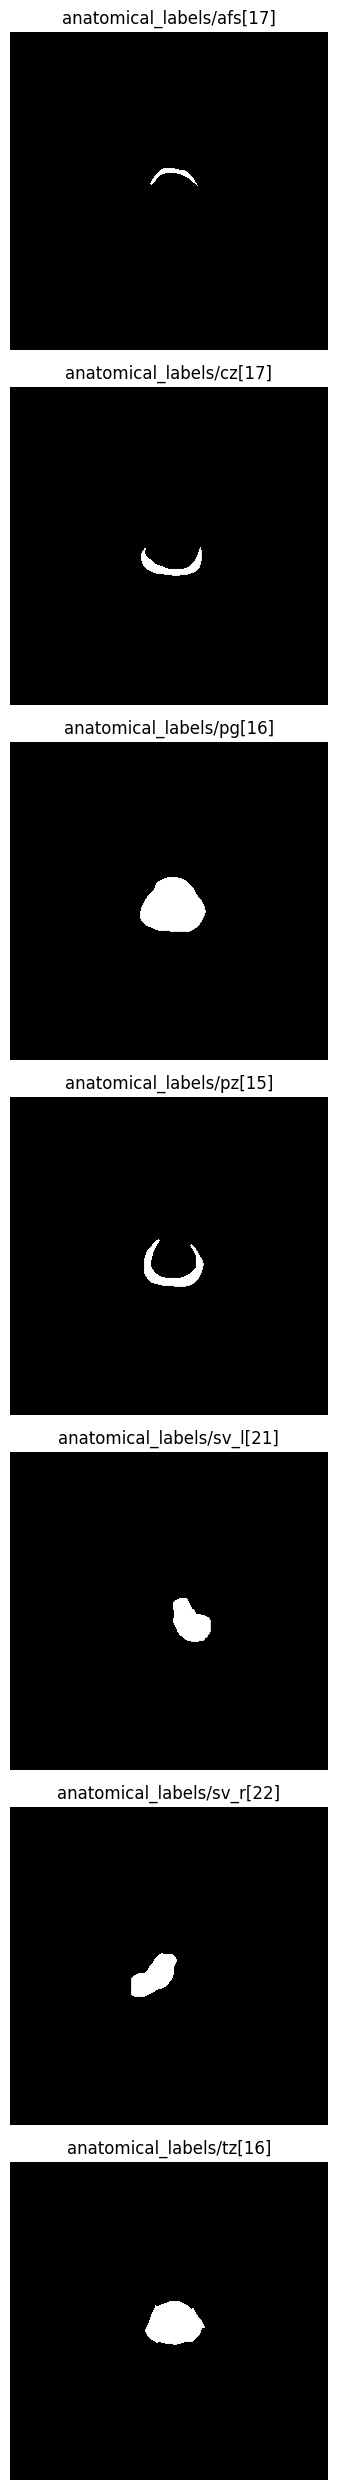

In [9]:
case.visualize('anatomical_labels/')

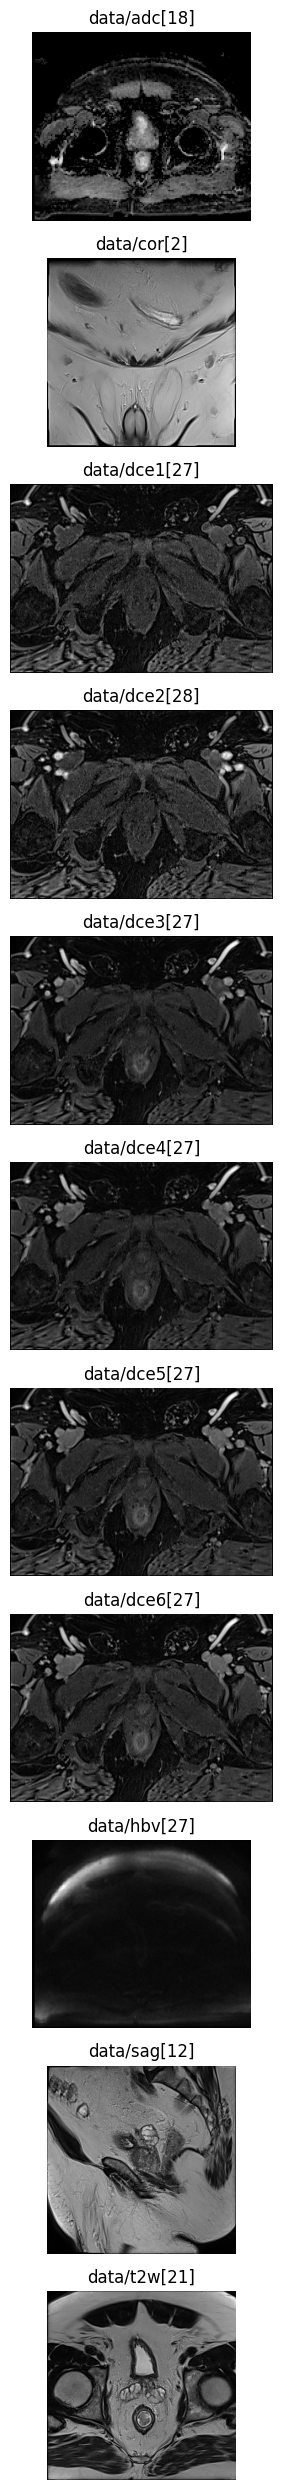

In [10]:
case.visualize('data/')

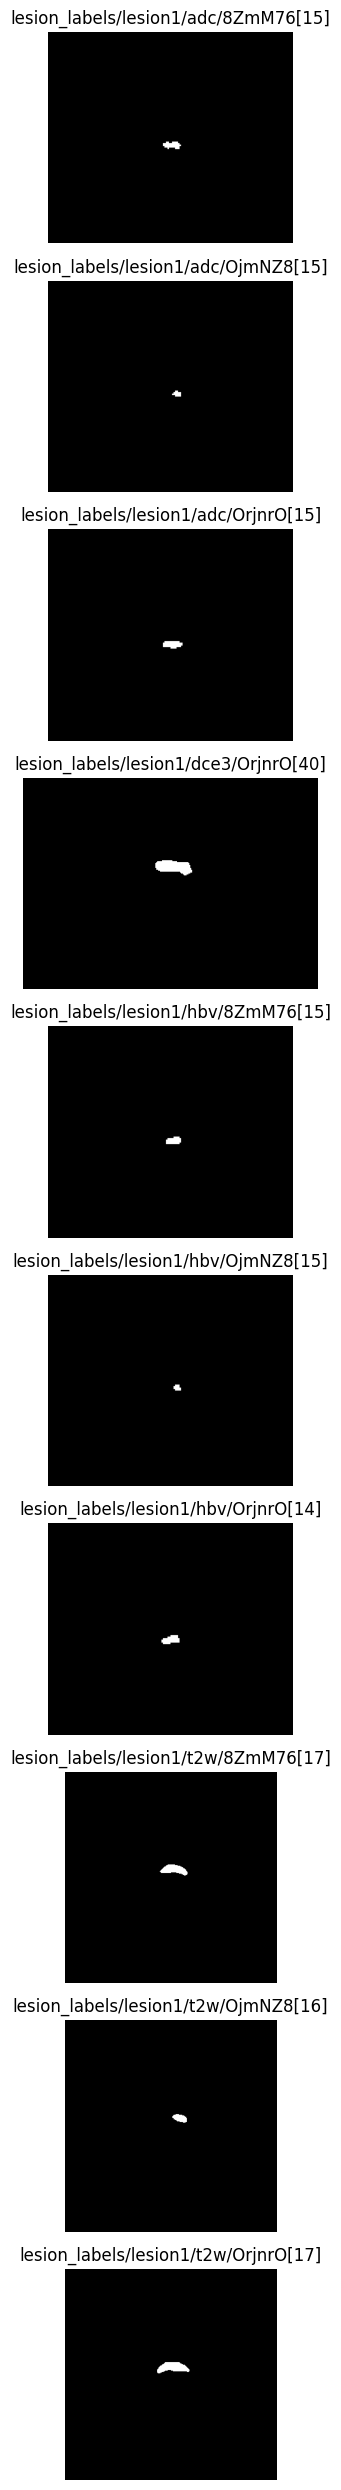

In [11]:
case.visualize('lesion_labels/')